# Introduction

Hello! We're Group 39, and for the final project we decided to discover the "best" neighborhood in Pittsburgh in terms of the *worst* living conditions. Essentially, we're finding the worst neighborhood in Pittsburgh to live in. In order to come to this conclusion, we analyzed median age of death, crime rate, and fire incident metrics per neighborhood. 

Let's start off with looking at how we studied the median age of death per neighborhood across Pittsburgh first. 

***

## Median Age at Death 

Hi, I'm Thanh Mai, who was in charge of looking over the median ages of death across each of Pittsburgh's neighborhoods. I initially wanted to work with air quality as my metric, but after working with the data set for a bit, I began to realize the information in that data set wasn't separated by neighborhoods, and thus not proper for the analysis I had in mind. I began looking for a different metric instead, and deciding to stick with health related metrics, I chose [Median Age at Death 2011-15 by Neighborhood, City of Pittsburgh](https://data.wprdc.org/dataset/median-age-death/resource/c2e1500a-a12a-4e91-be94-76c6a892b7e2) instead. Death can be a result of many things and sometimes these deaths have no stakes whatsoever on the location, but often times they do. Even if this assumption is wrong, a low median death age can bring about a more grim foreboding feeling when living in that neighborhood. Either way, it's somewhat self explanatory how a low median death age qualifies a neighborhood to be one of the worst neighborhoods. Regardless of how long we'd like to personally live, the median death age can be telling about living conditions and the health and/or safety of the environment there for the residents. 

To begin, let's import everything as necessary and read our data file.



In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('median-death-age.csv')

Taking a look at the data we're working with here in the file, we're given more information than we need to work with. In particular, it shows the median death age of white and black people per neighborgood, but for our needs we're only going to be focusing on the total medians. 

In [13]:
# our data is already organized pretty well for use, 
# so we're going to just sort them by their median age 
sorted_values = data.sort_values("TOTAL MD AGE AT DEATH")

# it looks like there's 2 outliers here, so we're going to 
# manually remove South Shore and Chateau ourselves 
sorted_values = sorted_values.drop(0)
sorted_values = sorted_values.drop(1)

# these aren't actual data entries, so we're going to trim
# the two end rows too 
sorted_values = sorted_values.drop(90) 
sorted_values = sorted_values.drop(91)

# let's take a look at the 10 lowest values now!
print(sorted_values[["NEIGHBORHOOD", "TOTAL MD AGE AT DEATH"]].head(10))

            NEIGHBORHOOD  TOTAL MD AGE AT DEATH
9              FAIRYWOOD                   53.3
7      ARLINGTON HEIGHTS                   63.7
3         ALLEGHENY WEST                   65.0
49        EAST ALLEGHENY                   66.2
42             ALLENTOWN                   66.5
38            MANCHESTER                   67.4
4            SAINT CLAIR                   67.5
22     NORTHVIEW HEIGHTS                   68.0
14  CALIFORNIA-KIRKBRIDE                   69.3
17                 BLUFF                   70.0


It looks like Fairywood has the lowest median age of death by quite a bit, but to get a better understanding of this data, let's make a visualization of it.

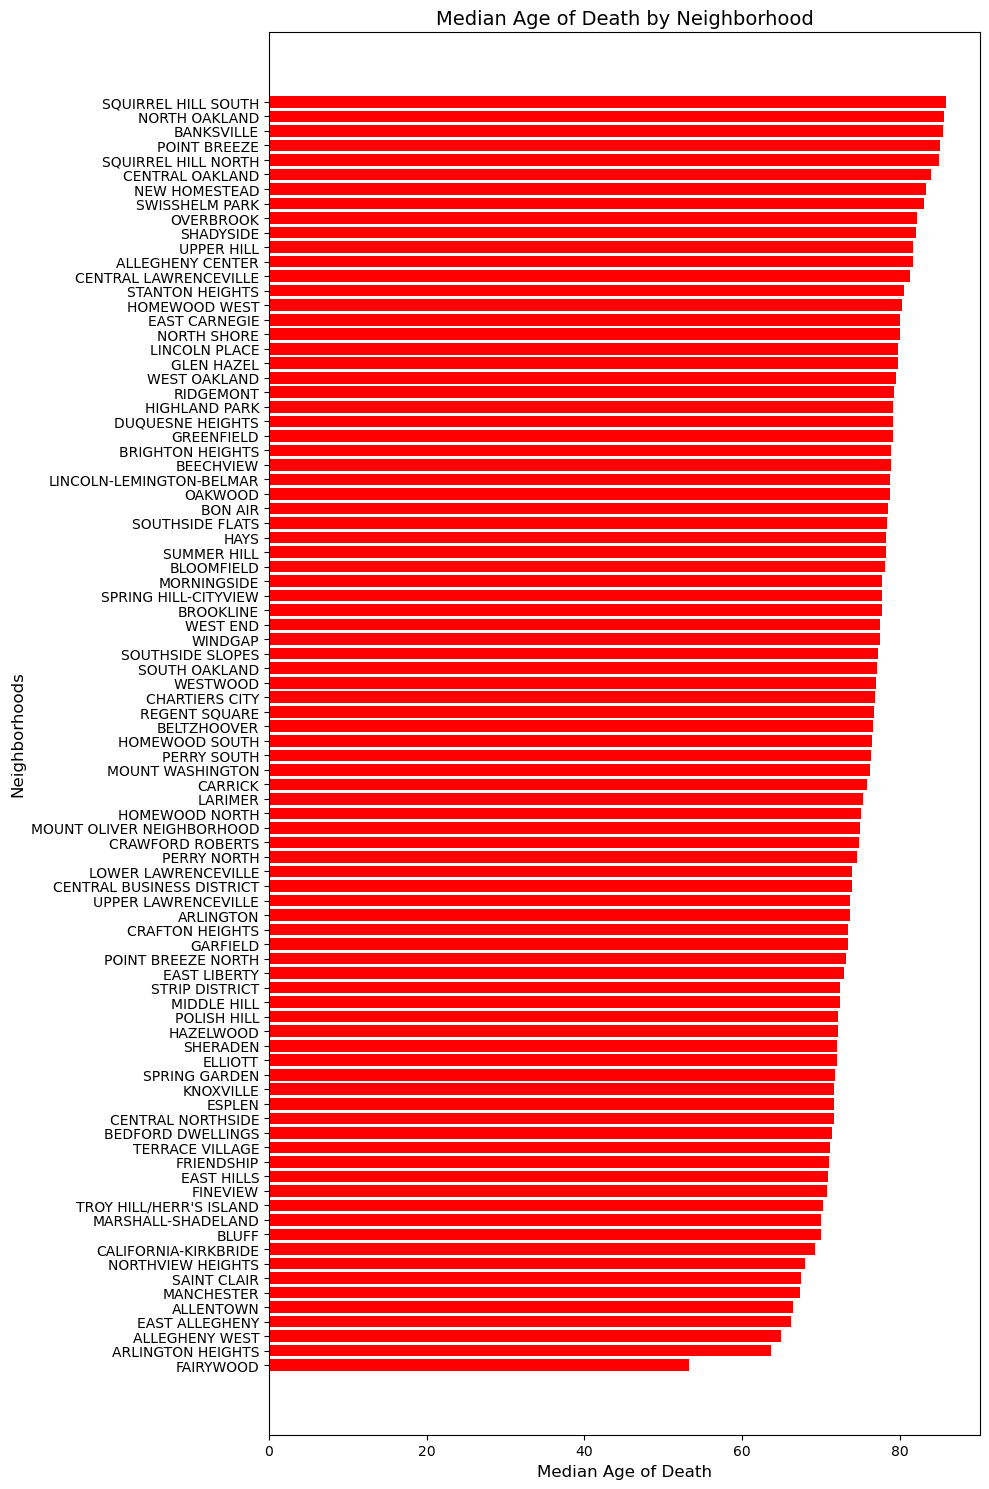

In [18]:
plt.figure(figsize=(10, 15))
plt.barh(sorted_values['NEIGHBORHOOD'], sorted_values['TOTAL MD AGE AT DEATH'], color='r')
plt.xlabel('Median Age of Death', fontsize=12)
plt.ylabel('Neighborhoods', fontsize=12)
plt.title('Median Age of Death by Neighborhood', fontsize=14)
plt.tight_layout()
plt.show()

*That's a pretty big graph.* The main takeaway we can deduce from it is that Fairywood's median age of death is fairly smaller than the rest of the neighborhoods in Pittsburgh by quite the fair amount. We can see that Squirrel Hill South, the neighborhood with the highest median age of death, is the start of a steady decline across the neighborhoods that only really drops off with Fairywood at the very end. 

Also judging from this graph, the average median age of death definitely seems to be between 60 and 80, whereas Fairywood's median age of death is below that. To be certain, we can calculate the mean for ourselves via the data. 

In [23]:
avg = sorted_values['TOTAL MD AGE AT DEATH'].mean() 

print(f"The average median age of death in Pittsburgh is {avg:.2f}.")

The average median age of death in Pittsburgh is 75.70.


*Wow,* that's actually a higher average than I thought. As we've already figured out, Fairywood's median age of death is 53.3 which is 22.4 years below average for Pittsburgh. The runner up for the lowest median age of death (Arlington Heights) has a difference of only 12, which is nearly half of Fairywood's deficit. 

It should be clear from here that Fairywood has the lowest median age of death in Pittsburgh, likely due to certain conditions in the area or the demographic of people there, which makes it the worst neighborhood in terms of livability, if you're looking to live a long or healthy life or a lively and long lasting community with continuity.

From this analysis, we've got a pretty good insight on which neighborhoods have the lowest life expectancy. Let's keep that in mind as we move onto our analysis of fire incidents across Pittsburgh's neighborhoods. 

---



## Fire Incidents

I am Emmett Willmot, a member of group 39. We chose to isolate the best worst neighborhood, meaning the best neighborhood with the lowest quality of living based off three metrics. Specifically, we used crime rate, median age of death, and fire incidents as our metrics. Intially I had planned to use public transit, but I encountered some issues with the dataset. I figured fire incidents are another decent indicator of issues with a neighborhood, so I decided to use that instead.

To start, Let's import pandas and matplotlib so we can properly work with and visualize the data.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("fire-incidents.csv")

#group data by neighborhood and incident count 
nbh_group = df.groupby('neighborhood')
incident_counts = nbh_group.size().reset_index(name='incident_count')
incident_counts = incident_counts.sort_values(by='incident_count', ascending=False)

#Lets take a look at the top 10 neighborhoods in term
print(incident_counts.head())

                 neighborhood  incident_count
15                    Carrick             307
16  Central Business District             292
72           South Side Flats             291
77        Squirrel Hill South             270
38                  Hazelwood             257


That gives a solid idea of what to expect from the rest of the neighborhoods, but lets put them into a bar graph to get a better look.

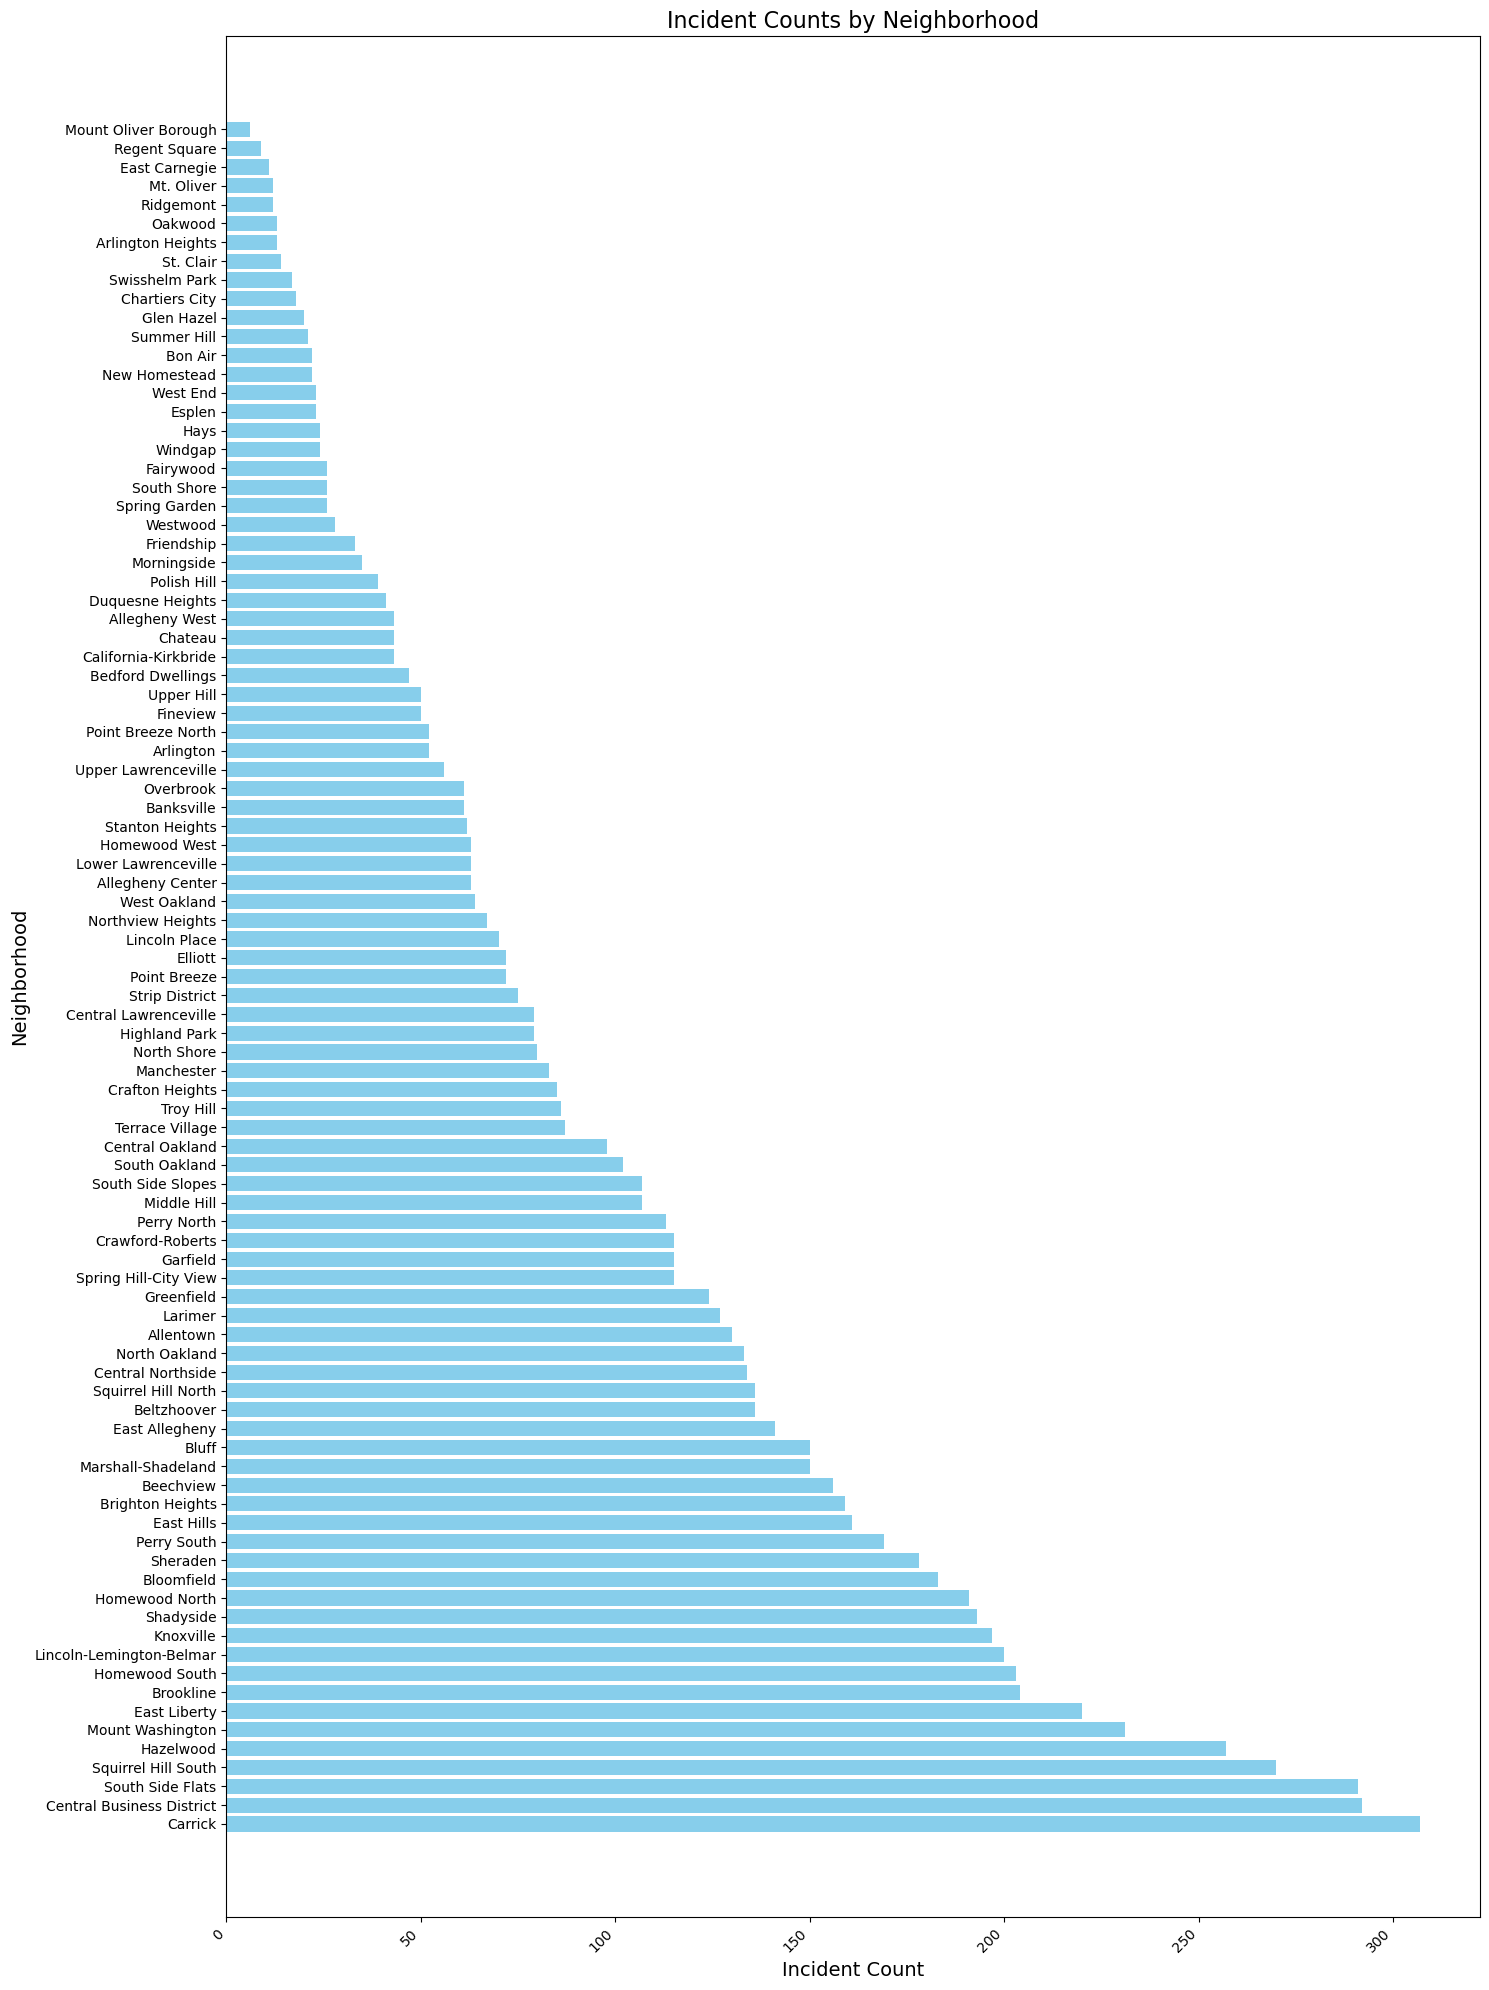

In [37]:

#format the chart 
plt.figure(figsize=(15, 20))
plt.barh(incident_counts['neighborhood'], incident_counts['incident_count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Incident Counts by Neighborhood', fontsize=16)
plt.ylabel('Neighborhood', fontsize=14)
plt.xlabel('Incident Count', fontsize=14)
plt.tight_layout()

plt.show()

Pretty large graph, but it makes it clearer where everything lines up. Carrick, Central Business District, South Side Flats, Squirrel Hill South, Hazelwood, Mount Washington, and East Liberity have the most considerable jump in incidents, making those neighborhoods what we will be considering primarily.

It looks like we don't have too much overlap here in the worst neighborhood just yet, but let's keep moving on, with crime rate per neighborhood in Pittsburgh analysis next. 

---

## Crime Rate

I am Nishanth Pullabhotla, also a member of group 39. I used the Pittsburgh Neighborhood Atlas, 1977 Crime Rate Dataset to determine what the best worst neighborhood is. There were technically two statistics or two data points in this dataset I could have used for measuring the worst neighborhood, the average crime rate and the total number of major crimes. The reason I went with the average crime rate is because there are some cases where the number of major crimes can look overwhelming or underwhelming at first but after taking the population of the neighborhood into account, then you would be able to understand that the number originally was not as significant. The average crime rate however is able to focus on the average crime rate because it accounts for variations in neighborhood population.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("crime-rate.csv")
df["average_crime_rate"] = (df["neighborhood_crime_rate_1973"] + df["neighborhood_crime_rate_1974"] + df["neighborhood_crime_rate_1975"])/3

df.sort_values("average_crime_rate")
df.sort_values("average_crime_rate", ascending=False, inplace=True)

#top 10 neighborhood crime rates
print(df[["neighborhood", "average_crime_rate"]].head(10))


                    neighborhood  average_crime_rate
44  North Side: North Shore Area            0.692333
18                      Downtown            0.652667
63                Strip District            0.504000
3               Allegheny Center            0.228333
4                 Allegheny West            0.184000
38                    Manchester            0.135667
21                  East Liberty            0.123667
66                        Uptown            0.114000
14            Central North Side            0.103667
56                          Soho            0.093667


As we can see here, the neighborhood with the highest crime rate is North Side: North Shore Area. Looking at the average crime rates, the rates drop significantly after the third neighborhood, Strip District. Let's look at all of the data in a nicer format such as a bargraph.



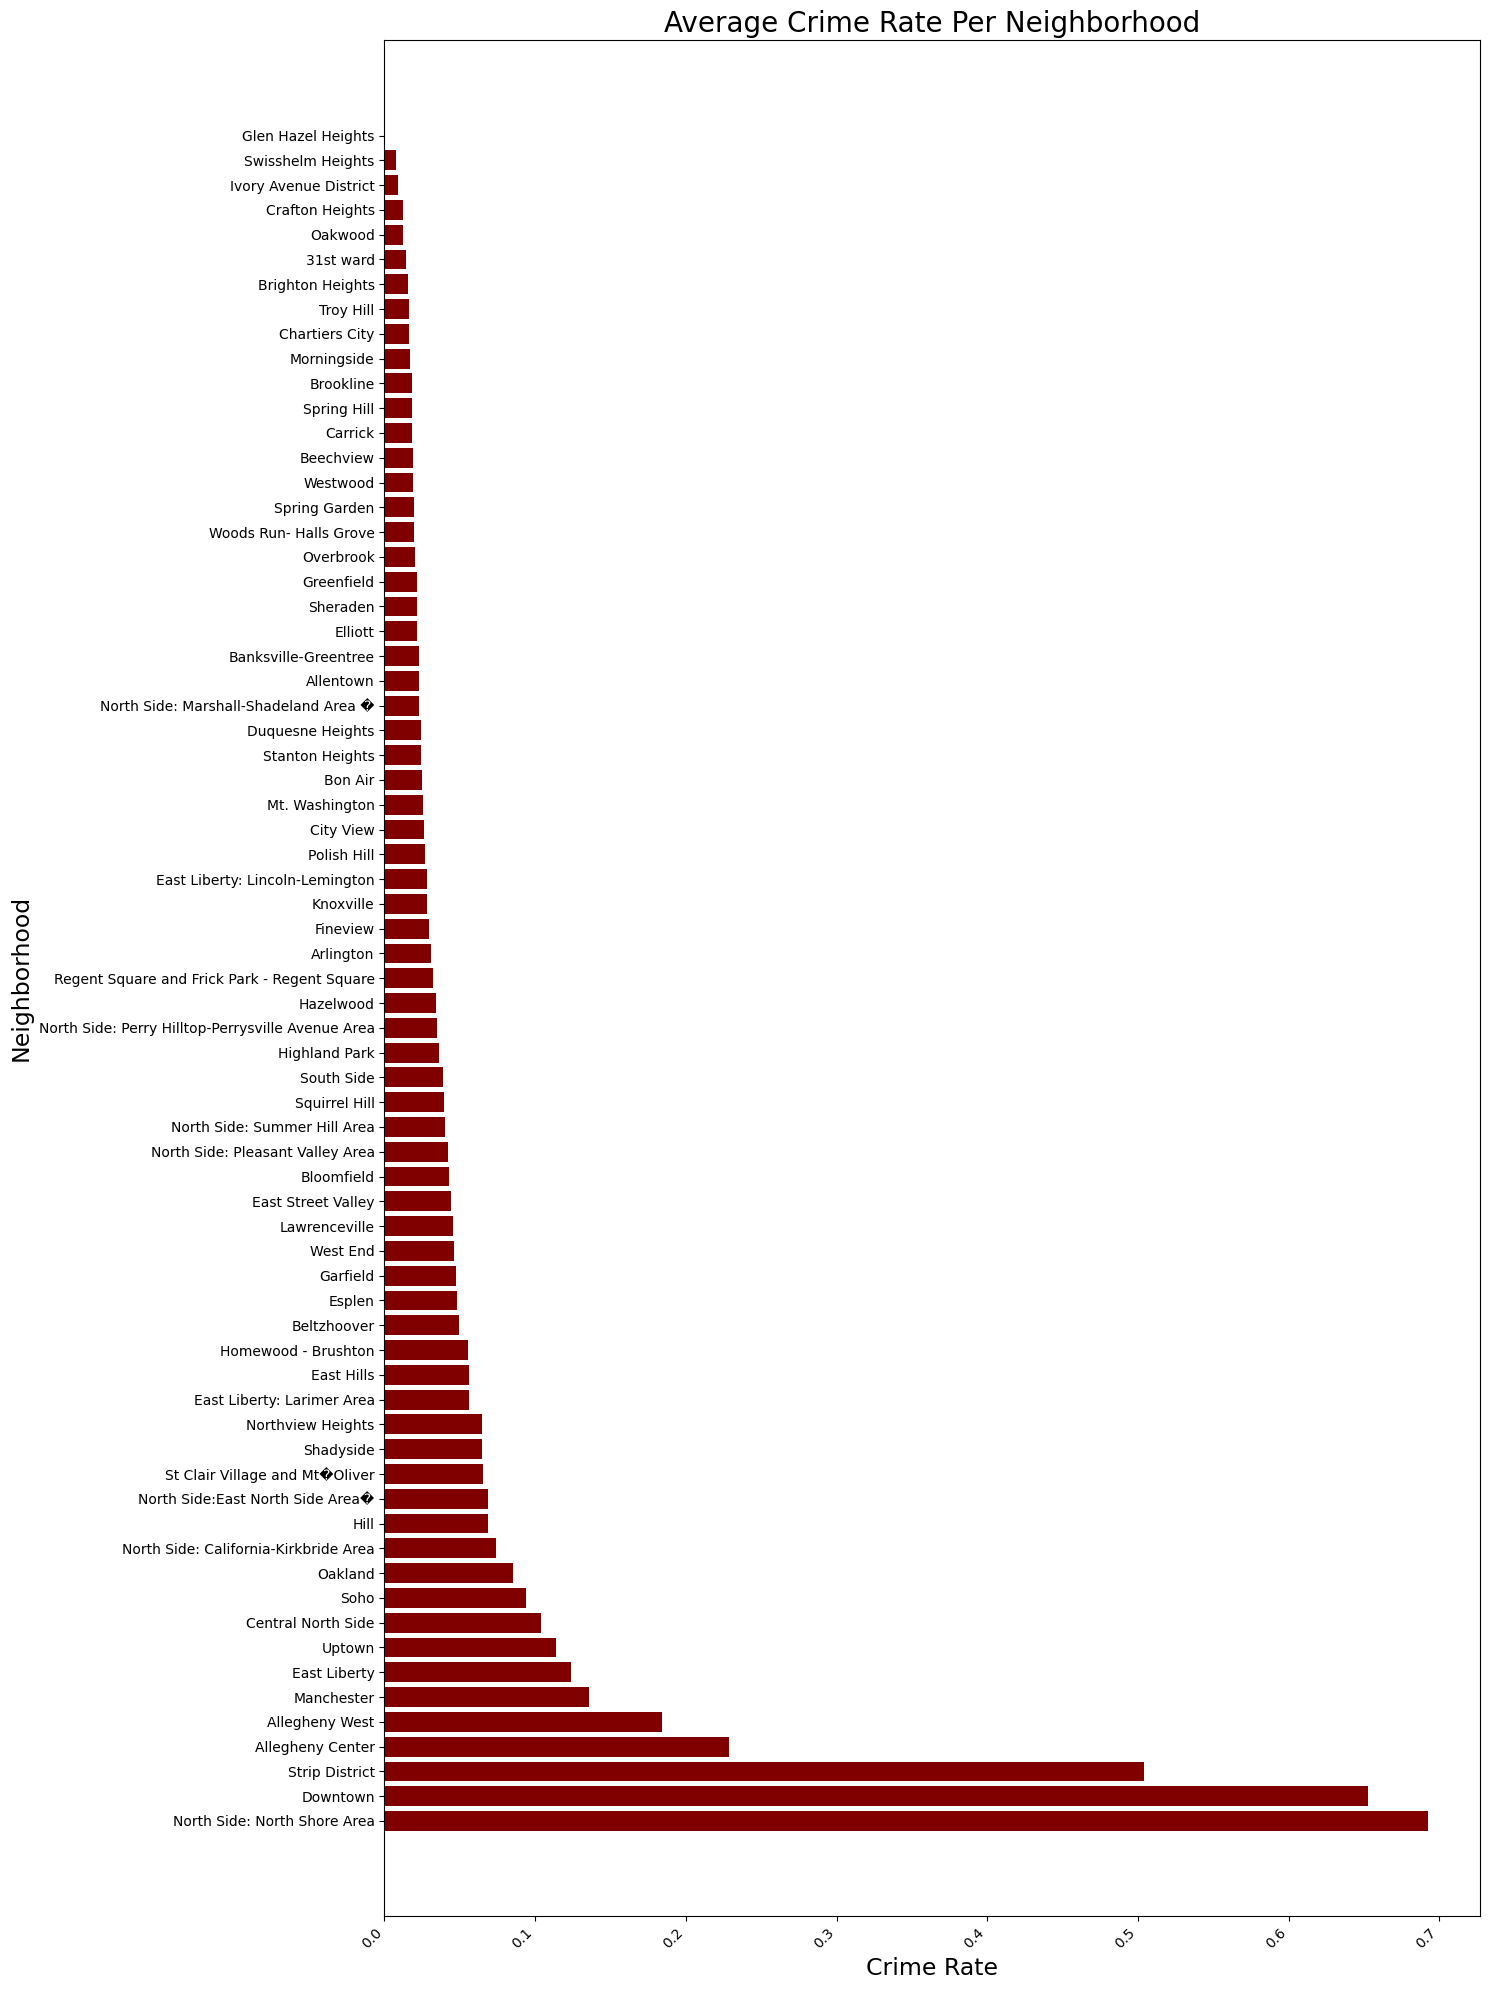

In [61]:
plt.figure(figsize=(15, 20))
plt.barh(df['neighborhood'], df['average_crime_rate'], color='maroon')
plt.xticks(rotation=45, ha='right')
plt.title("Average Crime Rate Per Neighborhood", fontsize=20)
plt.ylabel('Neighborhood', fontsize=17)
plt.xlabel('Crime Rate', fontsize=17)
plt.tight_layout()

plt.show()

We can easily analyze the data now and notice that the next lowest crime rate after the Strip District is the Allegheny Center which is nearly half of the crime rate for the Strip District. The neighborhoods we would consider that have the highest crime rate according to this data set would be North Side: North Shore Area, Downtown, and Strip District.

---

# Conclusion

Now that we have all our analysis done, we can bring all of our results together in order to come to a consensus about what is the best "worst" neighborhood in Pittsburgh to live in. 

You may have noticed already, but our individual studies don't really support each other. In terms of actual living conditions, these sort of metrics are somewhat subjective still - on one hand, we could argue otherwise in that everybody should want a safe neighborhood free of crime, but there are definitely people out there who do not have crime rate as their number one or even top five metrics to care about when considering where to live. That could be the same for all of our metrics. "Median Age of Death" in particular, because the cause of death can vary for many reasons unattached to the neighborhood, and living there does not imply that these statistics will impact you. With that being considered, the "worst" neighborhood is all up to preference. But in terms of our data, we can come up with little connections that help us come up with a conclusion through the lens we've constructed today by our analysis. 

The best we can make out of this relatively inconclusive data is that East Liberty ranks above average on the majority of the sets. While its not entirely perfect, East Liberty is the closest we can come to as a worst neighborhood. 

# Reflection
## Emmett:
I'm not a Pittsburgh local, so I didn't entirely know what to expect. The only neighborhood I'm familar with is Oakland, for obvious reasons, so I wasn't even conifdent all the data had proper neighborhoods. Trying to shove together a final bit with inconclusive data on an area I know nothing about was pretty difficult. Overall, it was an enjoybale project and a good way to learn more about Pittsburgh. 

## Thanh:
My 'favorite neighborhood' is probably West Oakland, although that is definitely because I didn't know any Pittsburgh neighborhoods before coming to Pitt. Needless to say, it is a relief that West Oakland - or even just Oakland in general - is different from our conclusion, considering the fact that we live there and I'd like for the place I live to have more favorable living conditions. 
